In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [54]:
data = pd.read_csv("Twitter_Sentiment_Data.csv", encoding = "cp1252", names = ["target", "ids", "date", "flag", "user", "text"])
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [55]:
data.shape

(1600000, 6)

# Observations:
- The dataset contains 16 lakh rows and 6 columns
- Each row of the dataset is a tweet done by a particular user.

In [56]:
data = data[["user", "text", "target"]]
data.head()

,user,text,target
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,ElleCTF,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....",0


# Target Column Analysis
- To understand the distribution of negative, postive and neutral tweets we perform analysis of target column

In [57]:
data["target"].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

# Observations:
- Out of 16 lakh tweets, 8 lakhs are +ve sentiment tweets and reamining 8 lakhs are -ve sentiment tweets.
- We conclude that the data does not contain neutral tweets.

# Converting 4 to 1:

In [58]:
data['target'] = data['target'].replace(4, 1)
data.head()

,user,text,target
0,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,scotthamilton,is upset that he can't update his Facebook by ...,0
2,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,ElleCTF,my whole body feels itchy and like its on fire,0
4,Karoli,"@nationwideclass no, it's not behaving at all....",0


In [59]:
data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [60]:
# Display the percentage of +ve and -ve tweets.

data['target'].value_counts(normalize = True) * 100

target
0    50.0
1    50.0
Name: proportion, dtype: float64

<Axes: xlabel='target', ylabel='count'>

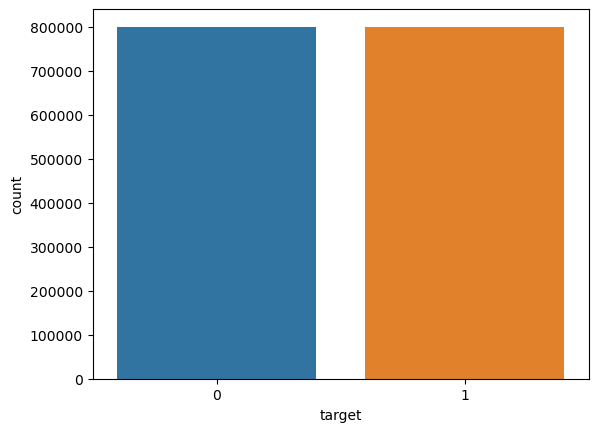

In [61]:
sns.countplot(x = data["target"])

In [62]:
# Checking missing values

data.isnull().sum()   # Data does not have missing values

user      0
text      0
target    0
dtype: int64

#### Notes:
- Will consider only 25% of the data i.e. out of 16 lakh rows we will be considering only 4 lakh rows.
- The reason is for seamless execution on our local system.
- The final data after reduction also contains equal number of +ve and -ve tweets.
- 4 lakh = 3 lakh + ve tweets and 1 lakh -ve tweets. Care to taken that this should not happen.
- 4 lakh = 2 lakh +ve tweets and 2 -ve tweets.

In [63]:
# Seperate all positive and negative tweets into 2 different variables

df_pos = data[data["target"] == 1]     ## Selecting only positive tweets in df_pos
df_neg = data[data["target"] == 0]     ## Selecting only negative tweets in df_neg  

In [64]:
df_pos["target"].value_counts()

target
1    800000
Name: count, dtype: int64

In [65]:
df_neg["target"].value_counts()

target
0    800000
Name: count, dtype: int64

#### Taking only 1/4th of the data from each df_pos and df_neg

In [66]:
df_pos = df_pos.iloc[:int(200000)]
df_neg = df_neg.iloc[:int(200000)]

In [67]:
df_pos.shape

(200000, 3)

In [68]:
df_neg.shape

(200000, 3)

#### Join df_pos & df_neg to get the complete data

In [69]:
data = pd.concat([df_pos, df_neg])
data.head()

,user,text,target
800000,ersle,I LOVE @Health4UandPets u guys r the best!!,1
800001,becca210,im meeting up with one of my besties tonight! ...,1
800002,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,katarinka,Being sick can be really cheap when it hurts t...,1
800004,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,1


In [70]:
data.shape

(400000, 3)

In [71]:
data["target"].value_counts()

target
1    200000
0    200000
Name: count, dtype: int64

# Data Pre processing on the text column

In [72]:
data["text"]

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
                                ...                        
199995                                  Doesn't feel good. 
199996                                       work... again 
199997    @damienfranco Its so common for it to crash no...
199998            my baby boy is wearing big boy underwear 
199999               Fml! I forgot my phone charger @home! 
Name: text, Length: 400000, dtype: object

### Converting all upper cases to lower cases

In [73]:
data["text"] = data["text"].str.lower()
data.head()

,user,text,target
800000,ersle,i love @health4uandpets u guys r the best!!,1
800001,becca210,im meeting up with one of my besties tonight! ...,1
800002,Wingman29,"@darealsunisakim thanks for the twitter add, s...",1
800003,katarinka,being sick can be really cheap when it hurts t...,1
800004,_EmilyYoung,@lovesbrooklyn2 he has that effect on everyone,1


In [75]:
data.tail(25)

,user,text,target
199975,AlessaGerman,@mileycyrus please come to germany again,0
199976,johnnapierce,helloo everyone! i'm at work until 5pm today a...,0
199977,susiehancock,there was a turtle in the pool this morning. m...,0
199978,chrislarvin,handed in dissertation yesterday morning...fol...,0
199979,Sevnth,my polaroid failed. - http://tweet.sg,0
199980,stacym16,has got so much stuff to do!!!...wanna be at t...,0
199981,Terrinixon,"@marns_ ugh mine's eased off nicely, hope you...",0
199982,ashleeadams,i feel sad and lonely and i miss kyle,0
199983,LINOOO,@sarah_1991 :@ it won't be for long. we'll be...,0
199984,limeice,@sloth13 blame him for all bad jobs. he gave m...,0


### Removing the urls from the text

In [76]:
def remove_urls(text):
    return re.sub("((www.[^s]+) | (https?://[^s]+))", "", text)
data['text'] = data['text'].apply(lambda x : remove_urls(x))

In [77]:
data.tail(25)

,user,text,target
199975,AlessaGerman,@mileycyrus please come to germany again,0
199976,johnnapierce,helloo everyone! i'm at work until 5pm today a...,0
199977,susiehancock,there was a turtle in the pool this morning. m...,0
199978,chrislarvin,handed in dissertation yesterday morning...fol...,0
199979,Sevnth,my polaroid failed. -sg,0
199980,stacym16,has got so much stuff to do!!!...wanna be at t...,0
199981,Terrinixon,"@marns_ ugh mine's eased off nicely, hope you...",0
199982,ashleeadams,i feel sad and lonely and i miss kyle,0
199983,LINOOO,@sarah_1991 :@ it won't be for long. we'll be...,0
199984,limeice,@sloth13 blame him for all bad jobs. he gave m...,0


### Removing the punctuations

In [78]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [79]:
import string
eng_punc = string.punctuation
eng_punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [80]:
def remove_punc(text):
    translator = str.maketrans('', '', eng_punc)     
    return text.translate(translator)

- Syntax : maketrans(str1, str2, str3)
- 
Paramete :                                                                                  - :
str1 : Specifies the list of characters that need to be replac
- e- d.
str2 : Specifies the list of characters with which the characters need to be repla
- c- ed.
str3 : Specifies the list of characters that needs to be del   

- In our case, str1 and str2 we have null string.
- since we want to delete the punctuations hence we are specifying eng_punc in place of str3.eted.

In [81]:
sent1 = "@this is very, interesting #learning!"
sent1

'@this is very, interesting #learning!'

In [82]:
sent1_new = remove_punc(sent1)
sent1_new

'this is very interesting learning'

In [83]:
data["text"] = data["text"].apply(lambda x : remove_punc(x))
data.head()

,user,text,target
800000,ersle,i love health4uandpets u guys r the best,1
800001,becca210,im meeting up with one of my besties tonight c...,1
800002,Wingman29,darealsunisakim thanks for the twitter add sun...,1
800003,katarinka,being sick can be really cheap when it hurts t...,1
800004,_EmilyYoung,lovesbrooklyn2 he has that effect on everyone,1


In [84]:
data.tail()

,user,text,target
199995,DivaDay,doesnt feel good,0
199996,gogetphilled,work again,0
199997,CocaBeenSlinky,damienfranco its so common for it to crash now...,0
199998,dwfavoritegirl,my baby boy is wearing big boy underwear,0
199999,LuisIsLegend,fml i forgot my phone charger home,0


In [85]:
df = pd.DataFrame({"name" : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
                   "age" : [20, 30, 40, 50, 60, 25, 35, 45]})
df

,name,age
0,A,20
1,B,30
2,C,40
3,D,50
4,E,60
5,F,25
6,G,35
7,H,45


In [86]:
df["name"] = df["name"].apply(lambda x : x.lower())
df

,name,age
0,a,20
1,b,30
2,c,40
3,d,50
4,e,60
5,f,25
6,g,35
7,h,45


### Removing all the stop words from the data

- Stops words are just the connecting words used in the sentences.
- For example : I am here to learn NLP. NLP is a very wide area of research.
- I, am, here, to, is, a, very, of - words which have got no meanings.

In [87]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words("english")
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [88]:
sent1_new

'this is very interesting learning'

In [89]:
sent2 = " ".join([word for word in sent1_new.split(" ") if word not in sw])
sent2

'interesting learning'

In [90]:
def remove_stopwords(text):
    return " ".join([word for word in text.split(" ") if word not in sw])


In [91]:
#sent3 = remove_stopwords(sent1_new)
#sent3

In [92]:
data["text"] = data["text"].apply(lambda x :remove_stopwords(x))
data.head()

,user,text,target
800000,ersle,love health4uandpets u guys r best,1
800001,becca210,im meeting one besties tonight cant wait gir...,1
800002,Wingman29,darealsunisakim thanks twitter add sunisa got ...,1
800003,katarinka,sick really cheap hurts much eat real food pl...,1
800004,_EmilyYoung,lovesbrooklyn2 effect everyone,1


In [93]:
data.tail()

,user,text,target
199995,DivaDay,doesnt feel good,0
199996,gogetphilled,work,0
199997,CocaBeenSlinky,damienfranco common crash find delete proces...,0
199998,dwfavoritegirl,baby boy wearing big boy underwear,0
199999,LuisIsLegend,fml forgot phone charger home,0


### Remvoing the digits from the text column

In [94]:
data.tail(20)

,user,text,target
199980,stacym16,got much stuff dowanna beach though,0
199981,Terrinixon,marns ugh mines eased nicely hope one wear tu...,0
199982,ashleeadams,feel sad lonely miss kyle,0
199983,LINOOO,sarah1991 wont long well back lead yn,0
199984,limeice,sloth13 blame bad jobs gave long lecture im wa...,0
199985,lintangkusuma,trouble boyf,0
199986,_coops_,awaltzforanight aww hugs know feels,0
199987,tatooinechick,think everyone sun tweets hours phonecalls wo...,0
199988,Julie_Price,yard selling alone today someone gave us 200 ...,0
199989,gabehabe,tinymicroserf like taste prawns cant eat feel ...,0


In [95]:
data.head(20)

,user,text,target
800000,ersle,love health4uandpets u guys r best,1
800001,becca210,im meeting one besties tonight cant wait gir...,1
800002,Wingman29,darealsunisakim thanks twitter add sunisa got ...,1
800003,katarinka,sick really cheap hurts much eat real food pl...,1
800004,_EmilyYoung,lovesbrooklyn2 effect everyone,1
800005,ajarofalmonds,productoffear tell burst laughing really loud ...,1
800006,vmdavinci,rkeithhill thans response ihad already find an...,1
800007,jessicavaliyi,keepinupwkris jealous hope great time vegas li...,1
800008,emmasaur28,tommcfly ah congrats mr fletcher finally joini...,1
800009,SherylBreuker,e4voip responded stupid cat helping type forg...,1


In [96]:
import re
def remove_num(text):
    return re.sub("[0-9]+", "", text)

data['text'] = data['text'].apply(lambda x : remove_num(x))

In [97]:
import re
txt = "abcd1234xyz789"
re.sub("[0-9]+","",txt)

'abcdxyz'

In [98]:
data.tail(15)

,user,text,target
199985,lintangkusuma,trouble boyf,0
199986,_coops_,awaltzforanight aww hugs know feels,0
199987,tatooinechick,think everyone sun tweets hours phonecalls wo...,0
199988,Julie_Price,yard selling alone today someone gave us dol...,0
199989,gabehabe,tinymicroserf like taste prawns cant eat feel ...,0
199990,Galiiit,uhohcaitie aw man jealous cant believe missed ...,0
199991,bluefuel318,warley like cant use search function w remote ...,0
199992,cwheeley,loganculwell sorry missed movie last night,0
199993,sarahheidi,nasty migraine day missed large quantity sunsh...,0
199994,alexissanch,main man thankfully hes crazy yet ps getting s...,0


### Clean and remove the repeating adjacent words to each other

In [100]:
t1 = "How are are you"
t2 = "Edpresso is the the the best platform to learn drawing"
t3 = "programming fun is fun always"

In [103]:
import re
regex = r'\b(\w+)(?:\W+\1\b)+'   # using the re to identify the repeated adjacent words in a sentence

In [104]:
re.sub(regex, r'\1', t1, flags = re.IGNORECASE)

'How are you'

In [105]:
re.sub(regex, r'\1', t2, flags = re.IGNORECASE)

'Edpresso is the best platform to learn drawing'

In [106]:
re.sub(regex, r'\1', t3, flags = re.IGNORECASE)

'programming fun is fun always'

In [107]:
def cleaning_dup_words(text):
    return re.sub(regex, r'\1', text, flags = re.IGNORECASE)

data['text'] = data['text'].apply(lambda x : cleaning_dup_words(x))
data.tail()

,user,text,target
199995,DivaDay,doesnt feel good,0
199996,gogetphilled,work,0
199997,CocaBeenSlinky,damienfranco common crash find delete proces...,0
199998,dwfavoritegirl,baby boy wearing big boy underwear,0
199999,LuisIsLegend,fml forgot phone charger home,0


#### Using the concept of regex:
- Remove all the emojis
- Remove all the extra spaces
- Remove all the usernames from the text
- Perform Stemming & lemmatization on the text